In [1]:
import pandas as pd
import numpy as np

In [2]:
ht = pd.read_csv('heart_attack_prediction_dataset.csv')

In [3]:
ht.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [5]:
ht.shape

(8763, 26)

In [6]:
ht.drop_duplicates()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [7]:
ht.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [8]:
ht['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [9]:
labels = ['Риска нет = 0', 'Риск есть = 1']

values = ht['Heart Attack Risk'].value_counts().to_numpy()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

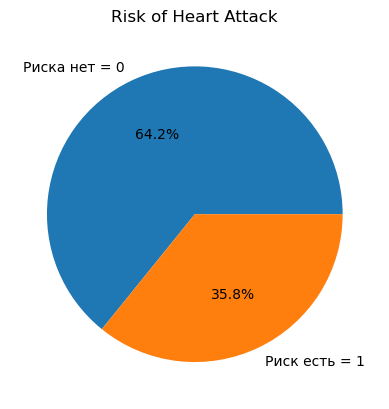

In [11]:
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Risk of Heart Attack')
plt.show()

In [12]:
ht.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [13]:
ht.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

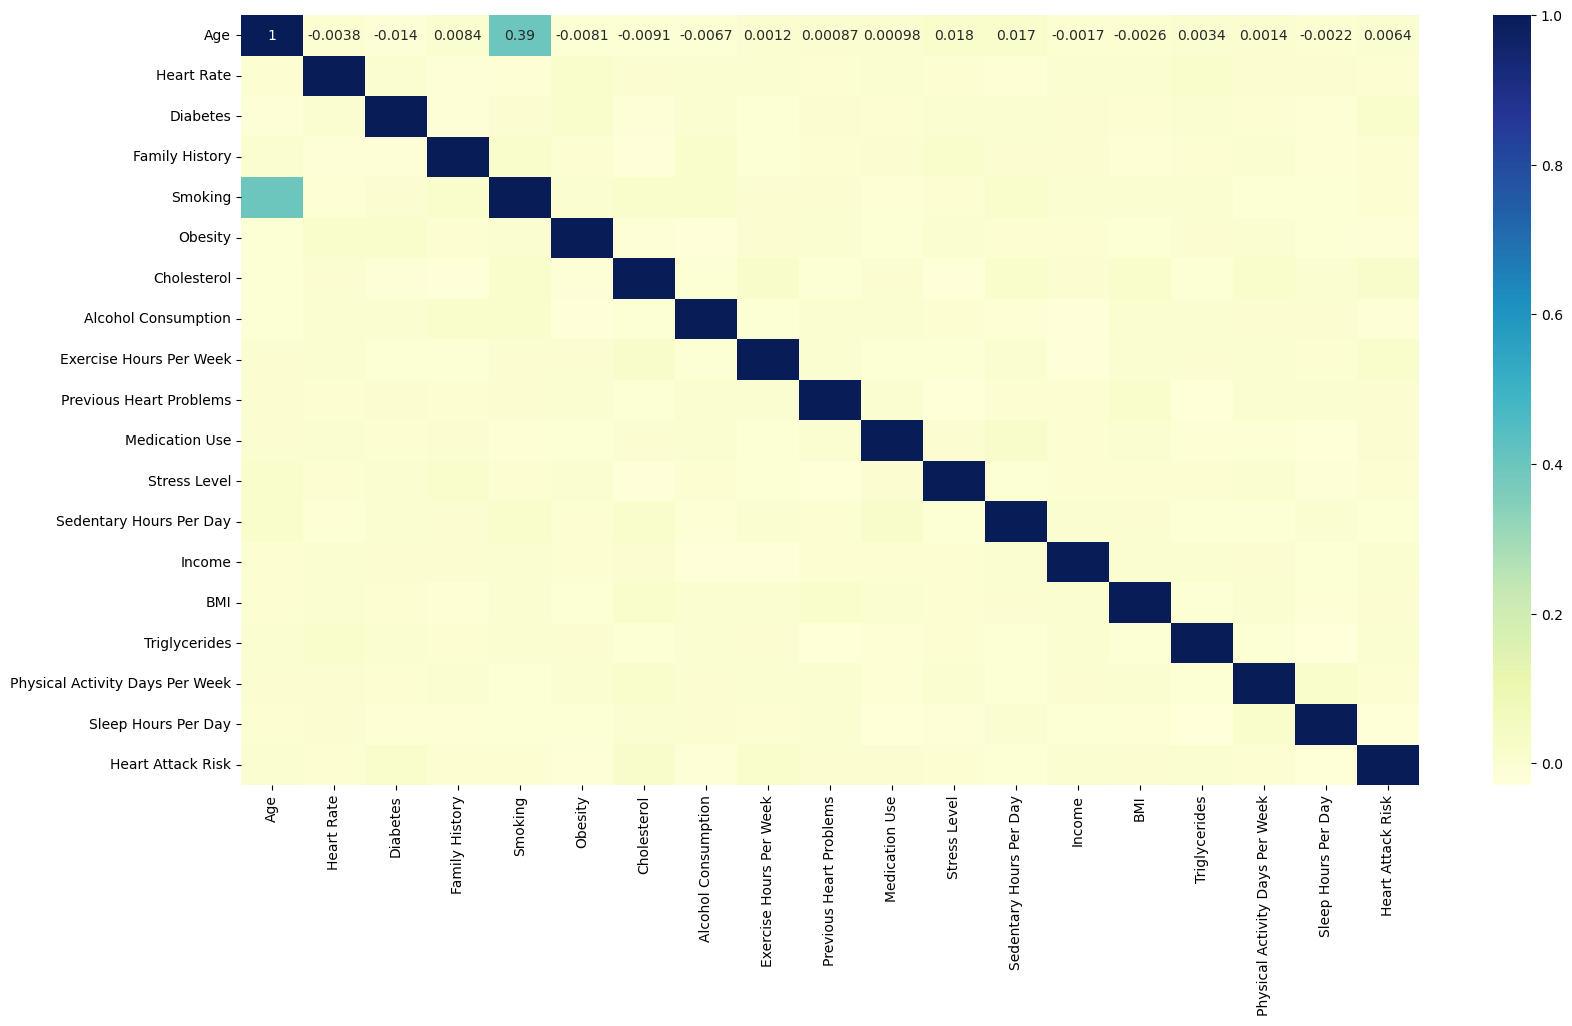

In [15]:
plt.figure(figsize = (19,10))
sns.heatmap(ht[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
      'Cholesterol','Alcohol Consumption', 'Exercise Hours Per Week',
     'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day','Heart Attack Risk']].corr(), cmap="YlGnBu",
            annot=True)

сильнее коррелирует с риском сердца диабет 'Diabetes', холестерин 'Cholesterol' и упражнения в неделю 'Exercise Hours Per Week'. Есть смысл глянуть также на пункт BMI - body mass index в таком случае

In [16]:
ht.groupby('Country')[['BMI']].mean().sort_values(by = "BMI") #среднее по странам

,BMI
Country,
Japan,28.291157
France,28.555747
Vietnam,28.668896
Spain,28.712143
Colombia,28.714773
New Zealand,28.766462
Argentina,28.794898
Thailand,28.819812
China,28.861312


In [17]:
ht.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

разделяю кровеносное давление между диастолическим и систолическим

In [18]:
ht['Systol_BP'] = ht['Blood Pressure'].apply(lambda x: x.split('/')[0])
ht['Diastol_BP'] = ht['Blood Pressure'].apply(lambda x: x.split('/')[1]) 

энкодинг диеты: 1: healthy, 2: average, 3: unhealthy

In [19]:
mapp = {'Healthy':2, 'Average':1, 'Unhealthy':0}
ht['Diet'] = ht['Diet'].map(mapp)

ван хот энкодинг для sex

In [20]:
ht = pd.get_dummies(ht, columns = ['Sex'])

In [21]:
ht.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

преобразование obj и bool типы в int

In [22]:
columnss = ['Sex_Female', 'Sex_Male', 'Systol_BP', 'Diastol_BP']
ht[columnss] = ht[columnss].astype(int)

In [23]:
ht.dtypes

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent                           object
Hemisphere 

Label Encoding для полушария тк всего 2 типа

In [24]:
marp = {'Northern Hemisphere': 1, 'Southern Hemisphere': 0}
ht['Hemisphere'] = ht['Hemisphere'].map(marp)

Frequency Encoding для континентов, тк нет повторябщихся значений

In [25]:
frequency = ht['Continent'].value_counts(normalize=True)

ht['Continent_Encoded'] = ht['Continent'].map(frequency)

In [26]:
ht['Continent_Encoded'].value_counts()

Continent_Encoded
0.290197    2543
0.255734    2241
0.155426    1362
0.100879     884
0.099623     873
0.098140     860
Name: count, dtype: int64

One hot encoding для country из-за того, что не вижу другого варианта закодить

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
encoder = OneHotEncoder(sparse=False)
country_encoded = encoder.fit_transform(ht[['Country']])

C:\Users\A\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


результат в датафрейм с названиями столбцов. после объед. с исходным датафреймом и дропаю country

In [29]:
country_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['Country']))
ht = pd.concat([ht.drop('Country', axis=1), country_df], axis=1)

In [30]:
ht.columns

Index(['Patient ID', 'Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Continent',
       'Hemisphere', 'Heart Attack Risk', 'Systol_BP', 'Diastol_BP',
       'Sex_Female', 'Sex_Male', 'Continent_Encoded', 'Country_Argentina',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_Colombia', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan',
       'Country_New Zealand', 'Country_Nigeria', 'Country_South Africa',
       'Country_South Korea', 'Country_Spain', 'Country_Thailand',
       'Country_United Kingdom', 'Country_United States', 'Country_Vietnam'],
      dtype='object')

In [49]:
X = ht[['Age', 'Cholesterol', 'Heart Rate',
       'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country_Argentina',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_Colombia', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan',
       'Country_New Zealand', 'Country_Nigeria', 'Country_South Africa',
       'Country_South Korea', 'Country_Spain', 'Country_Thailand',
       'Country_United Kingdom', 'Country_United States', 'Country_Vietnam',
       'Continent_Encoded', 'Hemisphere', 'Systol_BP',
       'Diastol_BP', 'Sex_Female', 'Sex_Male']]

y = ht['Heart Attack Risk'].values

In [50]:
X.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Encoded,Hemisphere,Systol_BP,Diastol_BP,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,...,0.0,0.0,0.0,0.0,0.155426,0,158,88,0,1
1,21,389,98,1,1,1,1,1,1.813242,0,...,0.0,0.0,0.0,0.0,0.098140,1,165,93,0,1
2,21,324,72,1,0,0,0,0,2.078353,2,...,0.0,0.0,0.0,0.0,0.255734,1,174,99,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,0.0,0.0,0.0,0.0,0.098140,1,163,100,0,1
4,66,318,93,1,1,1,1,0,5.804299,0,...,1.0,0.0,0.0,0.0,0.290197,1,91,88,0,1


In [51]:
y[1:10]

array([0, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [52]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 2, 3, 5, 8, 10, 15, 20, 25, 50],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'cosine'],
    'p': [1, 2] #p1 Мантхэттен, p2 Евклидово
}


grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')

In [56]:
grid_search.fit(train_X, train_y)

print('Best Params:', grid_search.best_params_)
print('Best CV accuracy:', grid_search.best_score_)

Best Params: {'metric': 'minkowski', 'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}
Best CV accuracy: 0.6407988587731811


In [57]:
from sklearn.metrics import classification_report

best_knn = grid_search.best_estimator_
test_predictions = best_knn.predict(test_X)

print(classification_report(test_y, test_predictions))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77      1114
           1       0.22      0.00      0.01       639

    accuracy                           0.63      1753
   macro avg       0.43      0.50      0.39      1753
weighted avg       0.48      0.63      0.49      1753



пробую древо решений

In [59]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [60]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [61]:
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [62]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [63]:
print('Best параметры:', grid_search.best_params_)
print('Best CV accuracy:', grid_search.best_score_)

Best параметры: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best CV accuracy: 0.6134094151212552


In [64]:
best_dtc = grid_search.best_estimator_
test_predictions = best_dtc.predict(test_X)

In [65]:
print(classification_report(test_y, test_predictions))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1114
           1       0.40      0.12      0.18       639

    accuracy                           0.61      1753
   macro avg       0.52      0.51      0.46      1753
weighted avg       0.55      0.61      0.54      1753



Наивный Байес

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [67]:
gnb = GaussianNB()

In [68]:
cv_scores = cross_val_score(gnb, train_X, train_y, cv=5, scoring='accuracy')

gnb.fit(train_X, train_y)

GaussianNB()

In [69]:
test_predictions = gnb.predict(test_X)

test_accuracy = accuracy_score(test_y, test_predictions)

In [70]:
print(f'CV accuracy: {cv_scores.mean():.3f}')
print(f'Test accuracy: {test_accuracy:.3f}')

CV accuracy: 0.558
Test accuracy: 0.552


пробую с логистической регрессией

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], #регуляризация
    'penalty': ['l1', 'l2']
}

In [73]:
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [74]:
print('Best параметры:', grid_search.best_params_)
print('Best CV accuracy:', grid_search.best_score_)

Best параметры: {'C': 0.01, 'penalty': 'l1'}
Best CV accuracy: 0.6433666191155493


In [75]:
best_log_reg = grid_search.best_estimator_
test_predictions = best_log_reg.predict(test_X)

In [78]:
test_accuracy = accuracy_score(test_y, test_predictions)
print('Test accuracy: %4.2f' % test_accuracy)

Test accuracy: 0.64


In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
train_X1, test_X1, train_y1, test_y1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [81]:
poly = PolynomialFeatures(degree = 3) #степень полинома

train_X_poly = poly.fit_transform(train_X1) 

test_X_poly = poly.transform(test_X1) #без повторного обучения

In [82]:
from sklearn.preprocessing import StandardScaler

масштабирую признаки

In [83]:
scaler = StandardScaler()

train_X_poly_scaled = scaler.fit_transform(train_X_poly)

test_X_poly_scaled = scaler.transform(test_X_poly)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [85]:
regr = LinearRegression()
regr.fit(train_X_poly_scaled, train_y)

y_pred = regr.predict(test_X_poly_scaled)

mse = mean_squared_error(test_y, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 23.061039510156455


In [86]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3.6780920249710816
